In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
def make_amatrix(n: int) -> np.array:
    A = np.zeros((n,n))
    for i in range(1,n):
        A[i-1, i-1] = 2
        A[i-1, i] = -1
        A[i, i-1] = -1

    A[n-1,n-1] = 2
    return A


def make_bvec(n: int) -> np.array:
    b = np.zeros(n)
    for i in range(0,n):
        b[i] = i
    
    return b

A = make_amatrix(5)
b = make_bvec(5)
print(A)
print(b)

[[ 2. -1.  0.  0.  0.]
 [-1.  2. -1.  0.  0.]
 [ 0. -1.  2. -1.  0.]
 [ 0.  0. -1.  2. -1.]
 [ 0.  0.  0. -1.  2.]]
[0. 1. 2. 3. 4.]


1000
[ 34.99999983  69.99999967 103.99999952 135.99999939 164.99999928
 189.9999992  209.99999915 223.99999914 230.99999915 229.9999992
 219.99999928 199.99999939 168.99999952 125.99999967  69.99999983]
9.552857218760793e-08


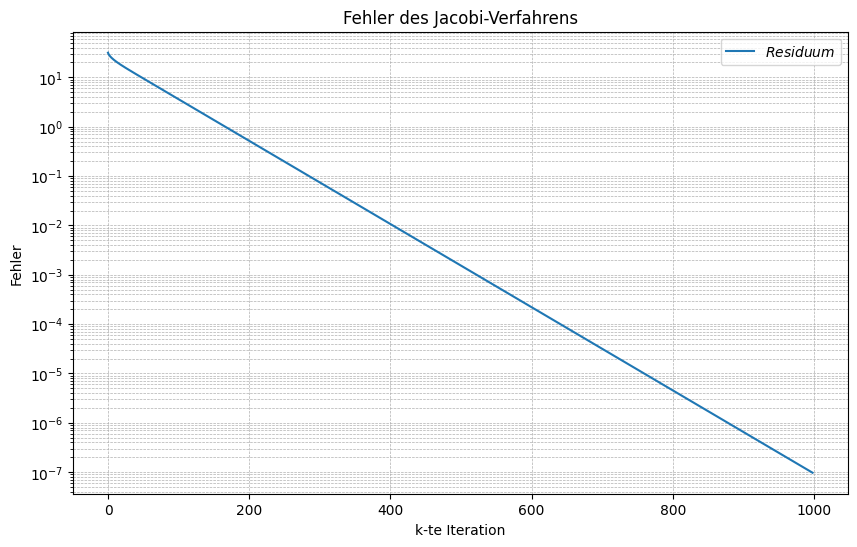

In [3]:
def jacobi_verfahren(A: np.array, b: np.array, max_iter: int, tol: float) -> tuple:
    diag = np.diag(A)
    D = np.diag(1/diag)
    LR = A - np.diag(diag)
    x = np.ones(np.shape(A)[0])

    iterations = 0
    resid_vec = list()

    for i in range(max_iter):
        resid = A @ x - b
        resid_vec.append(np.linalg.norm(resid))
        if np.linalg.norm(resid) < tol : 
            break
        else:
            x = D @ (b - LR @ x)
            #print(A @ x - b)
            iterations += 1
            
    print(iterations)
    return x, resid_vec


n = 15
A = make_amatrix(n)
b = make_bvec(n)
x, error = jacobi_verfahren(A, b, 1000, 1e-8)
print(x)
print(error.pop())

plt.figure(figsize=(10, 6))
plt.plot(error, label="$Residuum$")
plt.xlabel("k-te Iteration")
plt.ylabel("Fehler")
plt.yscale("log")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.title("Fehler des Jacobi-Verfahrens")
plt.show()